In [25]:
import random

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
header = 'data/VOCdevkit/VOC2012/'
with open('data/VOCdevkit/VOC2012/ImageSets/Segmentation/trainval.txt', 'r') as f:
    trainf = [line.strip() for line in f.readlines()]

In [45]:
def load_image(image_name):
    image = Image.open(header + 'JPEGImages/' + image_name + '.jpg')

    annotations = open(header + 'Annotations/' + image_name + '.xml').read()
    annotations = BeautifulSoup(annotations, 'html5lib')

    size = annotations.annotation.size
    w, h, d = int(size.width.text), int(size.height.text), int(size.depth.text)

    object_lst = []
    objects = annotations.findAll('object')
    for i, o in enumerate(objects):
        name = o.find('name').text
        xmin, xmax = int(o.bndbox.xmin.text), int(o.bndbox.xmax.text)
        ymin, ymax = int(o.bndbox.ymin.text), int(o.bndbox.ymax.text)
        
        object_lst.append({
            'name': name,
            'xmin': xmin,
            'xmax': xmax,
            'ymin': ymin,
            'ymax': ymax
        })

    seg_class = Image.open(header + 'SegmentationClass/' + image_name + '.png')
    seg_object = Image.open(header + 'SegmentationObject/' + image_name + '.png')
    
    return {
        'image': image,
        'size': (w, h, d),
        'objects': object_lst,
        'seg_class': seg_class,
        'seg_object': seg_object
    }

Object 0: tvmonitor, 374, 500, 1, 119
Object 1: person, 316, 500, 124, 375
Object 2: person, 217, 348, 15, 179
Object 3: person, 2, 203, 90, 334
Object 4: person, 34, 200, 94, 276


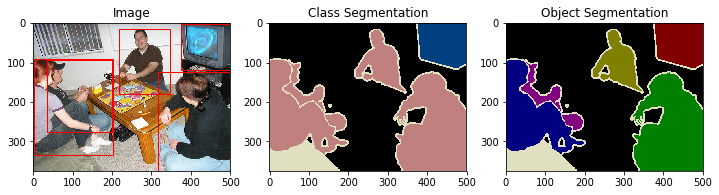

In [51]:
image_name = random.choice(trainf)
image_data = load_image(image_name)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 16))
ax1.set_title('Image')
ax1.imshow(image_data['image'])

for i, o in enumerate(image_data['objects']):
    name = o['name']
    xmin, xmax = o['xmin'], o['xmax']
    ymin, ymax = o['ymin'], o['ymax']
    
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax1.add_patch(rect)
    
    print('Object %s: %s, %s, %s, %s, %s' % (i, name, xmin, xmax, ymin, ymax))

ax2.set_title('Class Segmentation')
ax2.imshow(image_data['seg_class'])
ax3.set_title('Object Segmentation')
ax3.imshow(image_data['seg_object'])